In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
import math
import statistics
import numpy as np
import scipy.stats
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
#dealing with nan

x_nan = [1,2,3,math.nan,4,5]

np_a = np.array(x_nan)
pd_s = pd.Series(x_nan)

statistics.fmean(x_nan), np.mean(x_nan), np.average(x_nan), np.mean(np_a), np_a.mean()

(nan, nan, nan, nan, nan)

In [4]:
np.nanmean(np_a), pd_s.mean(), pd_s.mean(skipna=False)

(3.0, 3.0, nan)

In [5]:
data = [8.0, 1, 2.5, 4, 23, 28.0, 15, 16] 
weights = [0.1, 0.1, 0.3, 0.15, 0.1, 0.05, 0.1, 0.1]

np_d, pd_d, np_w = np.array(data), pd.Series(data), np.array(weights)

In [6]:
mean = np.mean(data)

In [7]:
#compute weighted arithmetic mean 

#just python
wmean1 = sum(weights[i] * data[i] for i in range(len(data))) / sum(weights)
wmean2 = sum(i*j for (i,j) in zip(data, weights)) / sum(weights)

#using numpy and pandas
wmean3 = (np_d* np_w).sum() / np_w.sum() 
wmean4 = np.average(pd_d, weights=np_w)

In [8]:
wmean1 == wmean2 == wmean3 == wmean4

True

In [9]:
#compute harmonic mean

hmean1 = len(data) / sum(1 / i for i in data)
hmean2 = statistics.harmonic_mean(data)
hmean3 = scipy.stats.hmean(np_d)
hmean4 = scipy.stats.hmean(pd_d)

In [10]:
hmean1 == hmean2 == hmean3 == hmean4

True

In [11]:
#compute geometric mean

gmean1 = math.prod(data) ** (1 / len(data))
gmean2 = statistics.geometric_mean(data)
gmean3 = scipy.stats.gmean(np_d)
gmean4 = scipy.stats.gmean(pd_d)

In [12]:
gmean1, gmean2, gmean3, gmean4

(7.700579113022808, 7.7005791130228065, 7.7005791130228065, 7.7005791130228065)

In [13]:
#compute median

median1 = sorted(data)[len(data)//2] if len(data) % 2 else (sorted(data)[len(data)//2-1] + sorted(data)[len(data)//2]) / 2
median2 = statistics.median(data)
median3 = np.median(np_d)
median4 = pd_d.median()

statistics.median_low(data), statistics.median_high(data), statistics.median(data), (8+15)/2

(8.0, 15, 11.5, 11.5)

In [14]:
median1, median2, median3, median4

(11.5, 11.5, 11.5, 11.5)

In [15]:
from boxplot import boxplot

DescribeResult(nobs=8, minmax=(1.0, 28.0), mean=12.1875, variance=98.99553571428571, skewness=0.3665059959111613, kurtosis=-1.2385373760277794)


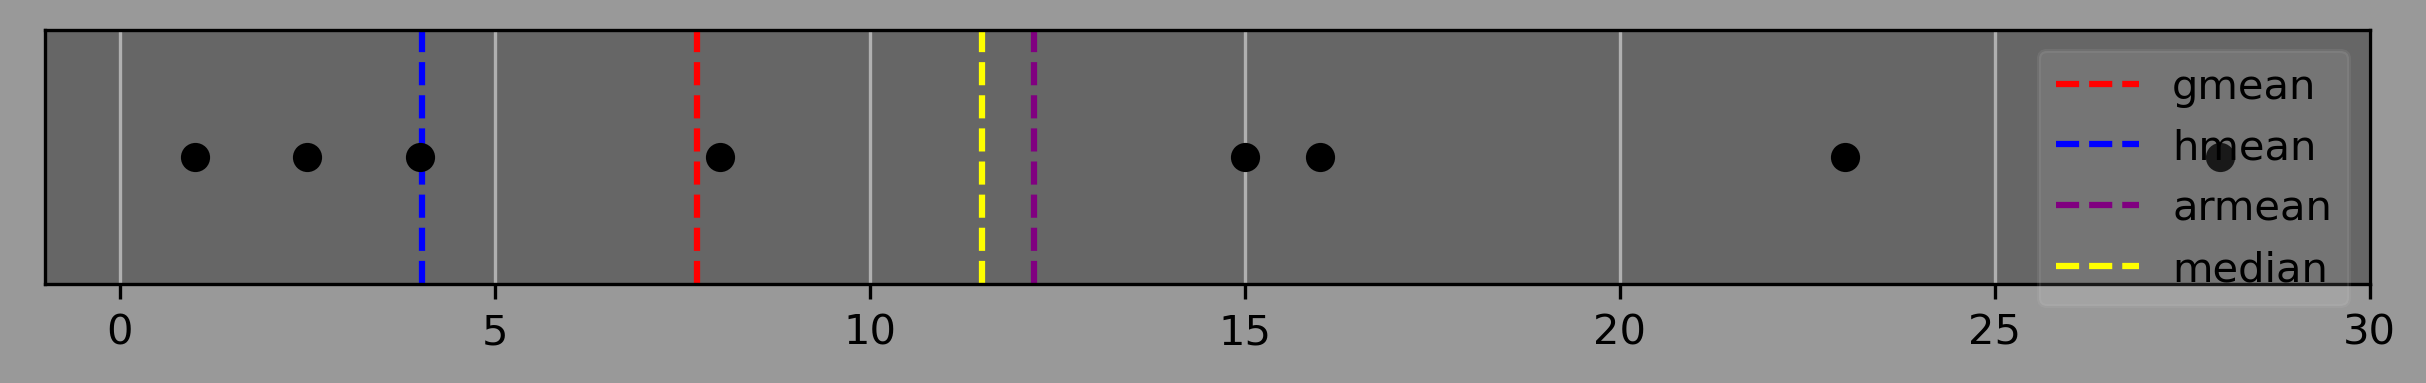

In [16]:
boxplot(data)

-------

In [17]:
more_data = [1,2,3,4,2,2,2,2]
multimodal_data = [1,2,2,3,3,4,5]
nan_as_mode = [0,math.nan,3,math.nan,4]

np_d2, np_multimodal_data  = np.array(more_data), np.array(multimodal_data)

In [18]:
#compute mode

mode1 = max((more_data.count(item), item) for item in set(more_data))[1]
mode2 = statistics.mode(more_data)

In [19]:
mode1, mode2

(2, 2)

In [20]:
#statistics.multimode returns a list with all modes if there are more than one

statistics.multimode(multimodal_data)

[2, 3]

In [21]:
#scipy.stats.mode will return the object with the modal value as well as the number of times it occurs

scipy_mode = scipy.stats.mode(np_d2)
scipy_mode

ModeResult(mode=array([2]), count=array([5]))

In [22]:
#methods for getting the mode and its number of occurrences as numpy array when using scipy.stats.mode

scipy_mode.mode, scipy_mode.count

(array([2]), array([5]))

In [23]:
#for multimodal data scipy.stats.mode will return only the smallest value

scipy.stats.mode(np_multimodal_data)

ModeResult(mode=array([2]), count=array([2]))

In [24]:
#getting mode using pandas .mode will return a new Series holding all modal values.

pd_data = pd.Series(more_data)
pd_multimodal = pd.Series(multimodal_data)

pd_data.mode(), pd_multimodal.mode()

(0    2
 dtype: int64,
 0    2
 1    3
 dtype: int64)

In [25]:
#pandas .mode method will ignore nan values by default. Alternatively use dropna=False

pd.Series(nan_as_mode).mode(dropna=False)

0   NaN
dtype: float64

In [26]:
#notice statistics.mode will return nan as mode if it is the most frequent value

statistics.mode(nan_as_mode)

nan

In [27]:
#with scipy.stats.mode you can choose how to handle 'nan' values

#scipy.stats.mode(nan_as_mode, nan_policy='raise')
print(scipy.stats.mode(nan_as_mode, nan_policy='propagate'))
print(scipy.stats.mode(nan_as_mode, nan_policy='omit'))

ModeResult(mode=array([nan]), count=array([2]))
ModeResult(mode=array([0.]), count=array([1.]))


In [28]:
def calculate_stats(values):
    minimum = min(values)
    maximum = max(values)
    average = sum(values) / len(values)
    return minimum, maximum, average

minimum, maximum, average = calculate_stats([1, 2, 3, 4, 5])

In [29]:
arr = np.random.randint(low=1, high=20, size=20)

condition = lambda x: (x > 5) & (x < 15)
filtered_arr1 = list(filter(condition,arr)) 

indices = np.where(5 < arr)
filtered_arr2 = arr[indices]
 

filtered_arr1, filtered_arr2

([8, 7, 11, 13, 12, 14, 6, 8, 7, 10],
 array([16,  8,  7, 11, 19, 13, 12, 14, 16,  6,  8, 15,  7, 15, 10]))

In [30]:
#broadcast in numpy

x = np.array([[1,2,3]])
y = np.array([[1],
              [2],
              [3]])

x+y

array([[2, 3, 4],
       [3, 4, 5],
       [4, 5, 6]])

In [31]:
#matrix multiplication

np.matrix([[1,2,3],[4,5,6]]) * np.matrix([[1,2],
                                          [3,4],
                                          [5,6]]) 

matrix([[22, 28],
        [49, 64]])

- $Q = {q_1, q_2, ..., q_n}$ is the set of states
- $\Sigma = {a_1, a_2, ..., a_m}$ is the set of input symbols
- $q_0$ is the initial state
- $F = {f_1, f_2, ..., f_n}$ is the set of final or accepting states
- $\delta : Q \times \Sigma \rightarrow Q$ is the transition function, where $\delta(q_i, a_j) = q_k$ is the next state when the machine is in state $q_i$ and receives input symbol $a_j$